# Parkinson's Disease Prediction 
#### Based on ThetaYC PCoA of Oral and Nasal Microbiome Using Machine Learning

- MGnify : https://www.ebi.ac.uk/metagenomics/
- Mothur : https://mothur.org/

In [1]:
import PIL.Image as pilimg
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

## Download Data
https://www.ebi.ac.uk/metagenomics/studies/MGYS00002211

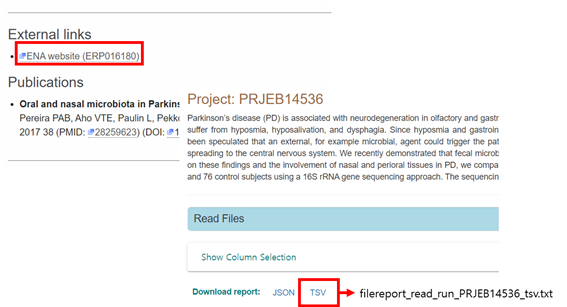

In [2]:
pilimg.open('./image01.png')

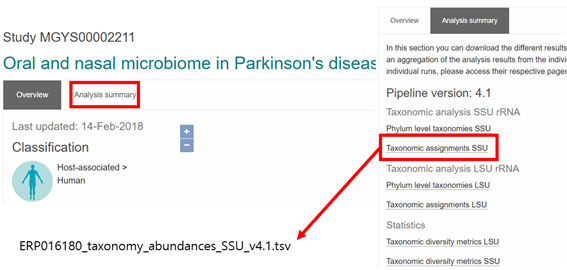

In [3]:
pilimg.open('./image02.png')

## Install Mothur
$ conda install -c bioconda mothur

## 필요한 Mothur 명령어
<p> mothur > rarefaction.single(shared=output.shared) </p>
<p> mothur > summary.single(shared=output.shared) </p>
<p> mothur > dist.shared(shared=output.shared, calc=thetayc-jclass, subsample=t) </p>
<p> mothur > pcoa(phylip=output.thetayc.MGnify.lt.ave.dist) </p>

## Data Analysis

In [4]:
report_df = pd.read_csv('./Data/filereport_read_run_PRJEB14536_tsv.txt', sep='\t')
report_df.head()

,run_accession,study_accession,sample_accession,secondary_sample_accession,tax_id,scientific_name,study_alias,submitted_ftp,sample_alias,sample_title
0,ERR1466857,PRJEB14536,SAMEA4044115,ERS1215225,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466857/P...,z1,oral microbiome
1,ERR1466858,PRJEB14536,SAMEA4044116,ERS1215226,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466858/P...,z2,oral microbiome
2,ERR1466859,PRJEB14536,SAMEA4044117,ERS1215227,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466859/P...,z3,oral microbiome
3,ERR1466860,PRJEB14536,SAMEA4044118,ERS1215228,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466860/P...,z4,oral microbiome
4,ERR1466861,PRJEB14536,SAMEA4044119,ERS1215229,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466861/P...,z5,oral microbiome


In [5]:
# Labeling
target1 = 1 # Parkinson
target2 = 0 # Control
target1_name = 'Parkinson'
target2_name = 'Control'

report_df['P/C'] = np.nan
for i in range(report_df.shape[0]) : 
    
    label = report_df['submitted_ftp'].iloc[i].split('/')[5].split('_')[0].split('-')
    if len(label) == 1:
        if 'P' in str(label):
            report_df['P/C'].iloc[i] = target1
        elif 'C' in str(label):
            report_df['P/C'].iloc[i] = target2
    elif len(label) > 1:
        if 'P' in str(label[1]):
            report_df['P/C'].iloc[i] = target1
        elif 'C' in str(label[1]):
            report_df['P/C'].iloc[i] = target2
        
report_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,run_accession,study_accession,sample_accession,secondary_sample_accession,tax_id,scientific_name,study_alias,submitted_ftp,sample_alias,sample_title,P/C
0,ERR1466857,PRJEB14536,SAMEA4044115,ERS1215225,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466857/P...,z1,oral microbiome,0.0
1,ERR1466858,PRJEB14536,SAMEA4044116,ERS1215226,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466858/P...,z2,oral microbiome,0.0
2,ERR1466859,PRJEB14536,SAMEA4044117,ERS1215227,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466859/P...,z3,oral microbiome,0.0
3,ERR1466860,PRJEB14536,SAMEA4044118,ERS1215228,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466860/P...,z4,oral microbiome,0.0
4,ERR1466861,PRJEB14536,SAMEA4044119,ERS1215229,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466861/P...,z5,oral microbiome,0.0


In [6]:
# Labeling
sample1 = 1 # Oral
sample2 = 0 # Nasal
sample1_name = 'Oral'
sample2_name = 'Nasal'

report_df['O/N'] = np.nan
for i in range(report_df.shape[0]) : 
    
    label = report_df['sample_title'].iloc[i]
    if 'oral' in str(label):
        report_df['O/N'].iloc[i] = sample1
    elif 'nasal' in str(label):
        report_df['O/N'].iloc[i] = sample2
        
report_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,run_accession,study_accession,sample_accession,secondary_sample_accession,tax_id,scientific_name,study_alias,submitted_ftp,sample_alias,sample_title,P/C,O/N
0,ERR1466857,PRJEB14536,SAMEA4044115,ERS1215225,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466857/P...,z1,oral microbiome,0.0,1.0
1,ERR1466858,PRJEB14536,SAMEA4044116,ERS1215226,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466858/P...,z2,oral microbiome,0.0,1.0
2,ERR1466859,PRJEB14536,SAMEA4044117,ERS1215227,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466859/P...,z3,oral microbiome,0.0,1.0
3,ERR1466860,PRJEB14536,SAMEA4044118,ERS1215228,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466860/P...,z4,oral microbiome,0.0,1.0
4,ERR1466861,PRJEB14536,SAMEA4044119,ERS1215229,447426,human oral metagenome,ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75,ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466861/P...,z5,oral microbiome,0.0,1.0


In [7]:
def make_shared(input_tsv, output_shared) : 
    ssu_df = pd.read_csv(input_tsv, sep='\t') # input_tsv = './ERP016180_taxonomy_abundances_SSU_v4.1.tsv'
    ssu_df = ssu_df[1:].reset_index(drop=True)
    ssu_df['OTU'] = np.nan
    ssu_df['Bacteria'] = np.nan

    for i in range(ssu_df.shape[0]) : 
        if 'Bacteria' in ssu_df['#SampleID'].iloc[i] : 
            ssu_df['Bacteria'].iloc[i] = "Bacteria"

    ssu_df = ssu_df[ssu_df['Bacteria'] == 'Bacteria']
    ssu_df = ssu_df.reset_index(drop=True)
    ssu_df = ssu_df.iloc[:,:-1]

    for i in range(ssu_df.shape[0]) : 
        ssu_df['OTU'].iloc[i] = 'Otu' + str(str(int(i)+1).rjust(4, '0'))

    ssu_df_shared = ssu_df.iloc[:,1:-1].T
    ssu_df_shared = ssu_df_shared.rename(columns=ssu_df_shared.iloc[-1]).iloc[:-1,:]
    ssu_df_shared['numOtus'] = ssu_df_shared.sum(axis=1)
    ssu_df_shared = ssu_df_shared.astype('int')

    shared_df = pd.DataFrame(columns=['label', 'Group', 'numOtus'])

    for i in range(ssu_df_shared.shape[0]) : 
        shared_df = shared_df.append({'label' : 'MGnify', 
                                  'Group' : ssu_df_shared.index[i], 
                                  'numOtus' : ssu_df.shape[0]}, ignore_index=True)

    shared = pd.concat([shared_df, ssu_df_shared.iloc[:,:-1].reset_index(drop=True)], axis=1)
    shared = shared.astype({'numOtus' : int})

    shared.to_csv(output_shared, sep = '\t', index = False) # output_shared = './ERP016180_taxonomy_abundances.shared'

    return ssu_df, shared

In [8]:
ssu_df, shared = make_shared('./Data/ERP016180_taxonomy_abundances_SSU_v4.1.tsv', './Data/output.shared')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
ssu_df.head()

,#SampleID,ERR1466857,ERR1466858,ERR1466859,ERR1466860,ERR1466861,ERR1466862,ERR1466863,ERR1466864,ERR1466865,...,ERR1467132,ERR1467133,ERR1467134,ERR1467135,ERR1467136,ERR1467137,ERR1467138,ERR1467139,ERR1467140,OTU
0,sk__Bacteria;k__;p__;c__;o__;f__;g__;s__Firmic...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otu0001
1,sk__Bacteria;k__;p__;c__;o__;f__;g__;s__Firmic...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otu0002
2,sk__Bacteria;k__;p__;c__;o__;f__;g__;s__Firmic...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Otu0003
3,sk__Bacteria;k__;p__;c__;o__;f__;g__;s__SR1_ba...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otu0004
4,sk__Bacteria;k__;p__;c__;o__;f__;g__;s__agricu...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otu0005


In [10]:
shared.head()

,label,Group,numOtus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
0,MGnify,ERR1466857,1914,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MGnify,ERR1466858,1914,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,MGnify,ERR1466859,1914,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MGnify,ERR1466860,1914,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MGnify,ERR1466861,1914,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Rarefaction Curve Plot

<p> Mothur를 이용해 output.shared 파일에서 output.groups.rarefaction 파일을 생성한다. </p>
<p> mothur > rarefaction.single(shared=output.shared) </p>

In [11]:
rarefaction = pd.read_csv('./Data/output.groups.rarefaction', sep='\t') 
rarefaction = rarefaction.iloc[:,[0]+list(range(1, rarefaction.shape[1], 3))]
rarefaction.columns = rarefaction.columns.str.replace('MGnify-', '')
rarefaction_df = rarefaction.iloc[:,1:]

label_df = pd.concat([report_df['run_accession'], report_df['P/C']], axis=1)
label_df = label_df.sort_values(by=['run_accession'], axis=0)

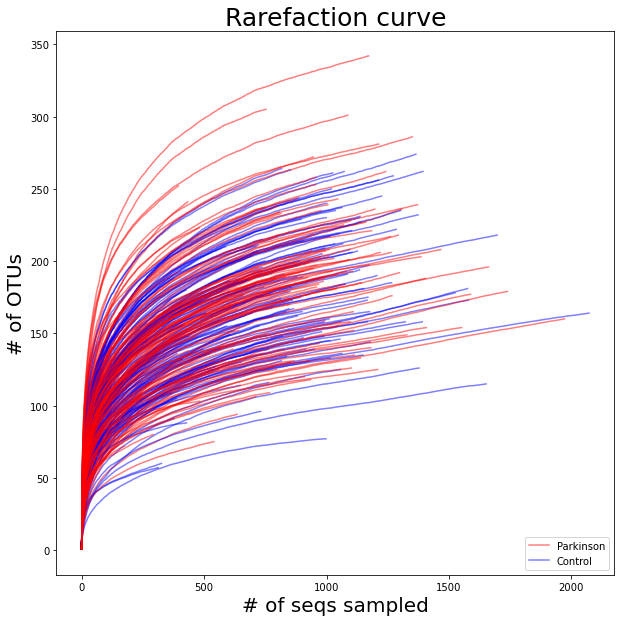

In [12]:
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Rarefaction curve', fontsize=25)
plt.xlabel('# of seqs sampled', fontsize=20)
plt.ylabel('# of OTUs', fontsize=20)

red = 0
blue = 0
for i in range(rarefaction_df.shape[1]) : 
    if list(label_df[label_df['run_accession'] == rarefaction_df.columns[i]]['P/C'])[0] == 1 : 
        plt.plot(rarefaction_df.iloc[:,i], color='red', alpha=0.5)
        red = i
    elif list(label_df[label_df['run_accession'] == rarefaction_df.columns[i]]['P/C'])[0] == 0 : 
        plt.plot(rarefaction_df.iloc[:,i], color='blue', alpha=0.5)
        blue = i

line1, = plt.plot(0,0, color='red', alpha=0.5)
line2, = plt.plot(0,0, color='blue', alpha=0.5)
plt.legend(handles=(line1, line2), labels=('Parkinson', 'Control'), loc='lower right')
plt.show()

## sobs, chao, simpson, shannon Matrix Plot

<p> summary.single 명령어를 “calc” 옵션 없이 실행한다. </p>
<p> mothur > summary.single(shared=output.shared) </p>

In [13]:
matrtix = pd.read_csv('./Data/output.groups.summary', sep='\t')
matrtix_df = pd.concat([matrtix['group'], 
                        matrtix['sobs'], 
                        matrtix['chao'], 
                        matrtix['simpson'], 
                        matrtix['shannon']], axis=1)

matrtix_df['P/C'] = np.nan
for i in range(matrtix_df.shape[0]) : 
    matrtix_df['P/C'].iloc[i] = list(label_df[label_df['run_accession'] == matrtix_df['group'].iloc[i]]['P/C'])[0]

matrtix_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,group,sobs,chao,simpson,shannon,P/C
0,ERR1466857,208.0,296.666667,0.145923,2.687906,0.0
1,ERR1466858,261.0,339.964286,0.093913,3.047466,0.0
2,ERR1466859,167.0,252.550000,0.445764,1.571606,0.0
3,ERR1466860,210.0,273.142857,0.187283,2.665951,0.0
4,ERR1466861,214.0,257.240000,0.157252,2.660610,0.0


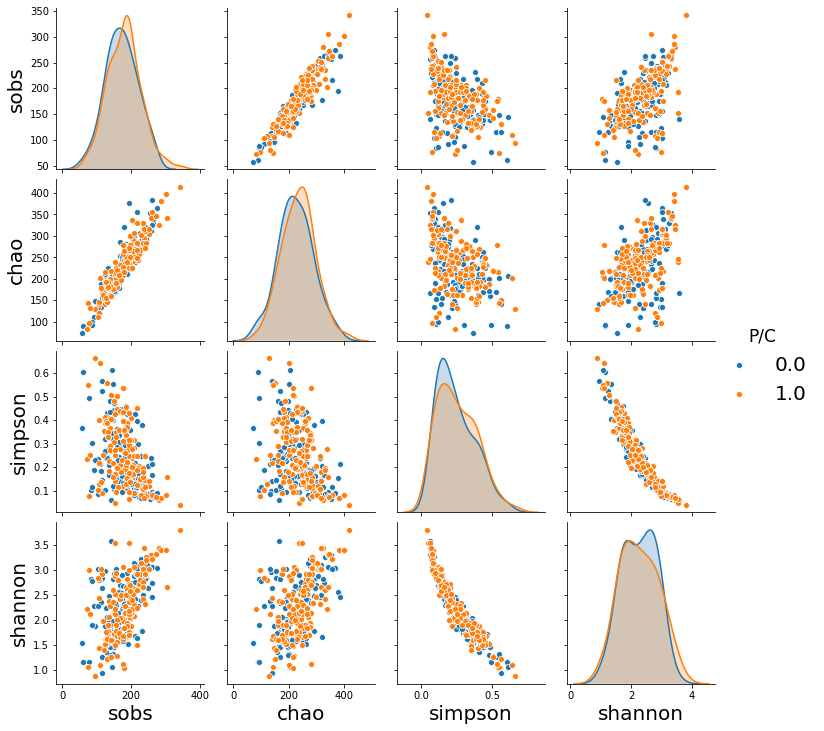

In [14]:
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=20)
sns.pairplot(matrtix_df, hue="P/C")

## ThetaYC PCoA

<p> mothur > dist.shared(shared=output.shared, calc=thetayc-jclass, subsample=t) </p>
<p> mothur > pcoa(phylip=output.thetayc.MGnify.lt.ave.dist) </p>

In [15]:
label_df = pd.concat([report_df['run_accession'], report_df['P/C'], report_df['O/N']], axis=1)
# label_df = pd.concat([report_df['run_accession'], report_df['Label'], report_df['Sample']], axis=1)
label_df = label_df.sort_values(by=['run_accession'], axis=0)
label_df.head()

,run_accession,P/C,O/N
0,ERR1466857,0.0,1.0
1,ERR1466858,0.0,1.0
2,ERR1466859,0.0,1.0
3,ERR1466860,0.0,1.0
4,ERR1466861,0.0,1.0


In [16]:
thetayc_pcoa = pd.read_csv('./Data/output.thetayc.MGnify.lt.ave.pcoa.axes', sep='\t')
thetayc_pcoa['P/C'] = np.nan
thetayc_pcoa['O/N'] = np.nan

# Join
for i in range(thetayc_pcoa.shape[0]) : 
    if thetayc_pcoa['group'].iloc[i] in list(label_df['run_accession']) : 
        thetayc_pcoa['P/C'].iloc[i] = list(label_df[label_df['run_accession'] == thetayc_pcoa['group'].iloc[i]]['P/C'])[0]
        thetayc_pcoa['O/N'].iloc[i] = list(label_df[label_df['run_accession'] == thetayc_pcoa['group'].iloc[i]]['O/N'])[0]

thetayc_pcoa.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,group,axis1,axis2,axis3,axis4,axis5,axis6,axis7,axis8,axis9,...,axis275,axis276,axis277,axis278,axis279,axis280,axis281,axis282,P/C,O/N
0,ERR1466857,-0.411342,0.023009,-0.111836,-0.049175,0.032019,-0.046189,0.022787,-0.032184,0.014784,...,0.000080,0.056721,0.012145,-0.042855,-0.042923,-0.004676,0.000029,0.0,0.0,1.0
1,ERR1466858,-0.339015,0.011344,-0.256895,-0.074644,-0.015965,-0.300484,0.079441,-0.022139,0.031577,...,0.001231,0.011733,0.001029,0.026834,-0.001331,-0.001060,0.000022,0.0,0.0,1.0
2,ERR1466859,-0.394216,0.014995,0.249491,0.049699,-0.012628,0.014592,-0.004317,0.026322,-0.006706,...,0.001496,-0.006059,0.002010,-0.003178,0.008900,0.001113,0.000023,0.0,0.0,1.0
3,ERR1466860,-0.427033,0.025092,0.015273,-0.014968,0.028550,-0.029547,0.022834,0.015924,0.008891,...,-0.001941,0.011324,-0.000266,-0.044123,-0.002737,-0.002341,0.000034,0.0,0.0,1.0
4,ERR1466861,-0.363533,0.011905,-0.115179,-0.048534,-0.008956,-0.111614,0.003450,-0.241533,0.032665,...,0.005379,0.115724,0.016344,-0.008297,-0.009654,-0.001910,0.000023,0.0,0.0,1.0


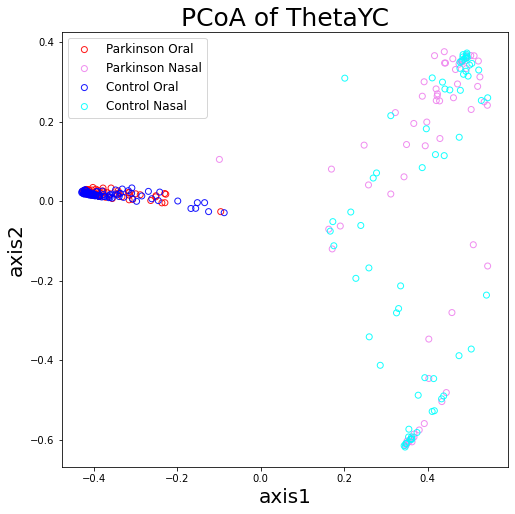

In [17]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.title('PCoA of ThetaYC', fontsize=25)
plt.xlabel('axis1', fontsize=20)
plt.ylabel('axis2', fontsize=20)

p_df = thetayc_pcoa[thetayc_pcoa['P/C'] == target1]
c_df = thetayc_pcoa[thetayc_pcoa['P/C'] == target2]

plt.scatter(p_df[p_df['O/N'] == sample1]['axis1'], 
            p_df[p_df['O/N'] == sample1]['axis2'], facecolors='none', edgecolors='red', alpha = 0.9)
plt.scatter(p_df[p_df['O/N'] == sample2]['axis1'], 
            p_df[p_df['O/N'] == sample2]['axis2'], facecolors='none', edgecolors='violet', alpha = 0.9)
plt.scatter(c_df[c_df['O/N'] == sample1]['axis1'], 
            c_df[c_df['O/N'] == sample1]['axis2'], facecolors='none', edgecolors='blue', alpha = 0.9)
plt.scatter(c_df[c_df['O/N'] == sample2]['axis1'], 
            c_df[c_df['O/N'] == sample2]['axis2'], facecolors='none', edgecolors='cyan', alpha = 0.9)
plt.legend([str(target1_name)+' '+str(sample1_name), 
            str(target1_name)+' '+str(sample2_name), 
            str(target2_name)+' '+str(sample1_name), 
            str(target2_name)+' '+str(sample2_name)], fontsize=12, loc='upper left')

## Prediction

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
def prediction(df):

    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-2], 
                                                        df['P/C'], 
                                                        test_size=0.2, 
                                                        random_state=42, 
                                                        stratify=df['P/C'])

    score_df = pd.DataFrame(columns=['K-NN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'])

    classifier = KNeighborsClassifier(n_neighbors = 3)
    classifier.fit(X_train, y_train)
    knn = classifier.score(X_test, y_test)

    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    dt = classifier.score(X_test, y_test)

    classifier = RandomForestClassifier(n_estimators=8)
    classifier.fit(X_train, y_train)
    rf = classifier.score(X_test, y_test)

    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    nb = classifier.score(X_test, y_test)

    classifier = SVC(kernel='linear')
    classifier.fit(X_train, y_train)
    svm = classifier.score(X_test, y_test)

    score_df = score_df.append({'K-NN' : knn, 
                                'Decision Tree' : dt, 
                                'Random Forest' : rf, 
                                'Naive Bayes' : nb, 
                                'SVM' : svm} , ignore_index=True)

    return score_df

In [20]:
score_df_1 = prediction(thetayc_pcoa)
print('All Samples')
score_df_1

All Samples


,K-NN,Decision Tree,Random Forest,Naive Bayes,SVM
0,0.614035,0.491228,0.649123,0.54386,0.45614


In [21]:
score_df_2 = prediction(thetayc_pcoa[thetayc_pcoa['O/N'] == sample1])
print(sample1_name)
score_df_2

Oral


,K-NN,Decision Tree,Random Forest,Naive Bayes,SVM
0,0.666667,0.633333,0.433333,0.466667,0.566667


In [22]:
score_df_3 = prediction(thetayc_pcoa[thetayc_pcoa['O/N'] == sample2])
print(sample2_name)
score_df_3

Nasal


,K-NN,Decision Tree,Random Forest,Naive Bayes,SVM
0,0.333333,0.666667,0.592593,0.481481,0.62963
